In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
# importing our fashion mnist dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


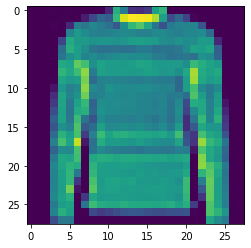

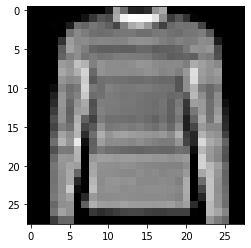

In [4]:
#viewing the images we are working with
i = random.randint(1,60000)
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train[i], cmap='gray')

In [5]:
#normalizing the images
x_train = x_train/255
x_test = x_test/255

In [6]:
#adding noise to the training set
noise_factor = 0.15

noise_dataset = []

for img in x_train:
    noisy_image = img + noise_factor * np.random.randn(*img.shape)
    noisy_image = np.clip(noisy_image,0,1)
    noise_dataset.append(noisy_image)

noise_dataset = np.array(noise_dataset)

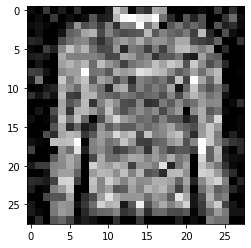

In [7]:
plt.imshow(noise_dataset[i], cmap = 'gray')

In [8]:
#adding noise to the test set
noise_dataset_test = []

for img_test in x_test:
    noisy_img_test = img_test + noise_factor * np.random.randn(*img_test.shape)
    noisy_img_test = np.clip(noisy_img_test,0,1)
    noise_dataset_test.append(noisy_img_test)

noise_dataset_test = np.array(noise_dataset_test)

In [9]:
# building the model

autoencoder = tf.keras.models.Sequential()
    #encoder
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides = 2, padding = 'same',input_shape=(28,28,1)))
autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides = 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides = 1, padding = 'same'))
    #decoder
autoencoder.add(tf.keras.layers.Conv2DTranspose(16, (3,3), strides = 2, padding = 'same'))
autoencoder.add(tf.keras.layers.Conv2DTranspose(1, (3,3), strides = 2, padding = 'same', activation = 'sigmoid'))

In [10]:
#compiling
autoencoder.compile(loss='binary_crossentropy', optimizer =tf.keras.optimizers.Adam(lr=0.001),metrics = ['accuracy'])
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 16)        1168      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [11]:
#training the model
autoencoder.fit(
    noise_dataset.reshape(-1,28,28,1),
    x_train.reshape(-1,28,28,1),
    epochs = 15,
    batch_size=200,
    validation_data = (noise_dataset_test.reshape(-1,28,28,1), x_test.reshape(-1,28,28,1)),
)

Epoch 1/15
300/300 [==============================] - 23s 76ms/step - loss: 0.3889 - accuracy: 0.4957 - val_loss: 0.3106 - val_accuracy: 0.5063
Epoch 2/15
300/300 [==============================] - 25s 83ms/step - loss: 0.3010 - accuracy: 0.5089 - val_loss: 0.2985 - val_accuracy: 0.5069
Epoch 3/15
300/300 [==============================] - 27s 90ms/step - loss: 0.2938 - accuracy: 0.5093 - val_loss: 0.2938 - val_accuracy: 0.5071
Epoch 4/15
300/300 [==============================] - 15s 50ms/step - loss: 0.2898 - accuracy: 0.5095 - val_loss: 0.2905 - val_accuracy: 0.5073
Epoch 5/15
300/300 [==============================] - 26s 87ms/step - loss: 0.2872 - accuracy: 0.5096 - val_loss: 0.2884 - val_accuracy: 0.5075
Epoch 6/15
300/300 [==============================] - 26s 88ms/step - loss: 0.2855 - accuracy: 0.5097 - val_loss: 0.2869 - val_accuracy: 0.5075
Epoch 7/15
300/300 [==============================] - 27s 89ms/step - loss: 0.2841 - accuracy: 0.5098 - val_loss: 0.2857 - val_accuracy:

In [12]:
predicted = autoencoder.predict(noise_dataset_test[10:20].reshape(-1,28,28,1))

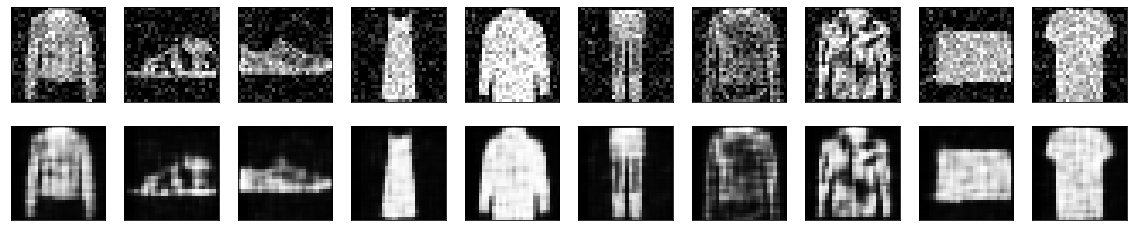

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for images, row in zip([noise_dataset_test[10:20], predicted],axes):
    for img, ax in zip(images,row):
        ax.imshow(img.reshape(28,28), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)